<a href="https://colab.research.google.com/github/amitroyal8755/Project/blob/main/Project_of_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_excel('flight_mode.xlsx')


In [ ]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [ ]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])


In [ ]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-09 05:50:00,2021-07-09 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-09 18:05:00,2021-07-09 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-09 16:50:00,2021-07-09 21:35:00,4h 45m,1 stop,No info,13302


In [ ]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
df['Date_of_Journey_day']=df['Date_of_Journey'].dt.day

In [ ]:
df['Date_of_Journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-09 05:50:00,2021-07-09 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-09 18:05:00,2021-07-09 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-09 16:50:00,2021-07-09 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
df['Arrival_Time_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time_minute']=df['Arrival_Time'].dt.minute
df['Dep_Time_hour']=df['Dep_Time'].dt.hour
df['Dep_Time_hour']=df['Dep_Time'].dt.minute

In [ ]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-09 05:50:00,2021-07-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-09 18:05:00,2021-07-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-09 16:50:00,2021-07-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,50


In [ ]:
del(df['Dep_Time'])
del(df['Arrival_Time'])

In [ ]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Duration                 object
Total_Stops              object
Additional_Info          object
Price                     int64
Date_of_Journey_day       int64
Date_of_Journey_month     int64
Arrival_Time_hour         int64
Arrival_Time_minute       int64
Dep_Time_hour             int64
dtype: object

In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]  

In [ ]:
df['Duration']=duration
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,50


In [ ]:
'2h 50m'.split()[0][0:-1]

'2'

In [ ]:
def hour_(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

df['Duration_hour']=df['Duration'].apply(hour_)
df['Duration_minute']=df['Duration'].apply(minute)

df.head()

del(df['Duration'])

In [ ]:

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,50,4,45


In [ ]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Date_of_Journey_day       int64
Date_of_Journey_month     int64
Arrival_Time_hour         int64
Arrival_Time_minute       int64
Dep_Time_hour             int64
Duration_hour            object
Duration_minute          object
dtype: object

In [ ]:
df['Duration_hour']=pd.to_numeric(df['Duration_hour'],errors='coerce')
df['Duration_minute']=pd.to_numeric(df['Duration_minute'],errors='coerce')

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Duration_hour', 'Duration_minute'],
      dtype='object')

In [ ]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
Date_of_Journey_day       int64
Date_of_Journey_month     int64
Arrival_Time_hour         int64
Arrival_Time_minute       int64
Dep_Time_hour             int64
Duration_hour             int64
Duration_minute           int64
dtype: object

In [ ]:
cat_values=[i for i in df.columns if df[i].dtypes=='object' ]
int_values=[i for i in df.columns if df[i].dtypes!='object' ]


In [ ]:
print(cat_values)
print(int_values)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
['Price', 'Date_of_Journey_day', 'Date_of_Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Dep_Time_hour', 'Duration_hour', 'Duration_minute']


In [ ]:
cat_values=df[cat_values]
int_values=df[int_values]


In [ ]:
cat_values.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
len(cat_values['Airline'].unique())

12

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Duration_hour', 'Duration_minute'],
      dtype='object')

In [ ]:
for i in ['Source', 'Destination']:
    print(i+' _catagorical',len(cat_values[i].unique()))

Source _catagorical 5
Destination _catagorical 6


In [ ]:
Airline=pd.get_dummies(cat_values['Airline'],drop_first=True)

Source=pd.get_dummies(cat_values['Source'],drop_first=True)

Destination=pd.get_dummies(cat_values['Destination'],drop_first=True)

del(cat_values['Airline'])
del(cat_values['Source'])
del(cat_values['Destination'])


In [ ]:
cat_values.columns

Index(['Route', 'Total_Stops', 'Additional_Info'], dtype='object')

In [ ]:
cat_values.head()

,Route,Total_Stops,Additional_Info
0,BLR → DEL,non-stop,No info
1,CCU → IXR → BBI → BLR,2 stops,No info
2,DEL → LKO → BOM → COK,2 stops,No info
3,CCU → NAG → BLR,1 stop,No info
4,BLR → NAG → DEL,1 stop,No info


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cat_values['Route_1']=cat_values['Route'].str.split().str[0]
cat_values['Route_2']=cat_values['Route'].str.split().str[1]
cat_values['Route_3']=cat_values['Route'].str.split().str[2]
cat_values['Route_4']=cat_values['Route'].str.split().str[3]
cat_values['Route_5']=cat_values['Route'].str.split().str[4]

In [ ]:
cat_values['Route_3'].isnull().sum()

0

In [ ]:
cat_values['Route_3']=np.where(cat_values['Route_3'].isnull(),'None',cat_values['Route_3'])
cat_values['Route_4']=np.where(cat_values['Route_4'].isnull(),'None',cat_values['Route_4'])
cat_values['Route_5']=np.where(cat_values['Route_5'].isnull(),'None',cat_values['Route_5'])

In [ ]:
cat_values.head()

,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,non-stop,No info,BLR,→,DEL,None,None
1,CCU → IXR → BBI → BLR,2 stops,No info,CCU,→,IXR,→,BBI
2,DEL → LKO → BOM → COK,2 stops,No info,DEL,→,LKO,→,BOM
3,CCU → NAG → BLR,1 stop,No info,CCU,→,NAG,→,BLR
4,BLR → NAG → DEL,1 stop,No info,BLR,→,NAG,→,DEL


In [ ]:
del(cat_values['Route'])

In [ ]:
cat_values.head()

,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,No info,BLR,→,DEL,None,None
1,2 stops,No info,CCU,→,IXR,→,BBI
2,2 stops,No info,DEL,→,LKO,→,BOM
3,1 stop,No info,CCU,→,NAG,→,BLR
4,1 stop,No info,BLR,→,NAG,→,DEL


In [ ]:
cat_values.columns

Index(['Total_Stops', 'Additional_Info', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
for i in [ 'Route_1', 'Route_2', 'Route_3','Route_4', 'Route_5']:
    print(i,len(cat_values[i].unique()))

Route_1 5
Route_2 1
Route_3 40
Route_4 2
Route_5 27


In [ ]:
cat_values.columns

Index(['Total_Stops', 'Additional_Info', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
for i in ['Route_1', 'Route_2', 'Route_3','Route_4', 'Route_5']:
    cat_values[i]=le.fit_transform(cat_values[i])


In [ ]:
cat_values.head()

,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,No info,0,0,10,0,21
1,2 stops,No info,2,0,20,1,1
2,2 stops,No info,3,0,27,1,4
3,1 stop,No info,2,0,29,1,3
4,1 stop,No info,0,0,29,1,7


In [ ]:
cat_values['Total_Stops']=cat_values['Total_Stops'].map({i:k for k,i in enumerate(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],0)})

In [ ]:
cat_values.head()

,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,No info,0,0,10,0,21
1,1,No info,2,0,20,1,1
2,1,No info,3,0,27,1,4
3,2,No info,2,0,29,1,3
4,2,No info,0,0,29,1,7


In [ ]:
del(cat_values['Additional_Info'])

In [ ]:
cat_values.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,0,10,0,21
1,1,2,0,20,1,1
2,1,3,0,27,1,4
3,2,2,0,29,1,3
4,2,0,0,29,1,7


In [ ]:
int_values.head()

,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Duration_hour,Duration_minute
0,3897,24,3,1,10,20,2,50
1,7662,5,1,13,15,50,7,25
2,13882,6,9,4,25,25,19,0
3,6218,5,12,23,30,5,5,25
4,13302,3,1,21,35,50,4,45


In [ ]:
df1=pd.concat((Airline,Source,Destination,cat_values,int_values),axis=1)

In [ ]:
pd.set_option('display.max_columns',35)

In [ ]:
df1

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Price,Date_of_Journey_day,Date_of_Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Duration_hour,Duration_minute
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,21,3897,24,3,1,10,20,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,20,1,1,7662,5,1,13,15,50,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,27,1,4,13882,6,9,4,25,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,0,29,1,3,6218,5,12,23,30,5,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,29,1,7,13302,3,1,21,35,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,5,0,21,4107,4,9,22,25,55,2,30
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,5,0,21,4145,27,4,23,20,45,2,35
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10,0,21,7229,27,4,11,20,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,21,12648,3,1,14,10,30,2,40


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sk=SelectKBest(mutual_info_classif,k=10)

In [ ]:
sk.fit(df1,df['Price'])

SelectKBest(k=10, score_func=<function mutual_info_classif at 0x7f2d0a707830>)

In [ ]:
df1.columns[sk.get_support()]

Index(['Delhi', 'Cochin', 'Total_Stops', 'Route_1', 'Route_3', 'Route_4',
       'Route_5', 'Price', 'Arrival_Time_hour', 'Duration_hour'],
      dtype='object')

In [ ]:
df_2=df1[['Total_Stops', 'Route_1', 'Route_2', 'Route_3',
       'Price', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour']]

In [ ]:
df_2.head()

,Total_Stops,Route_1,Route_2,Route_3,Price,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,0,0,0,10,3897,1,10,2
1,1,2,0,20,7662,13,15,7
2,1,3,0,27,13882,4,25,19
3,2,2,0,29,6218,23,30,5
4,2,0,0,29,13302,21,35,4


In [ ]:
#dealing with the outlier

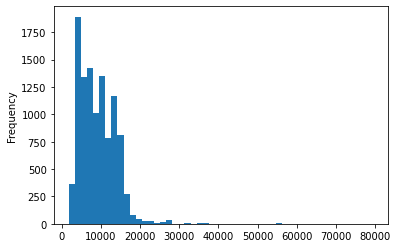

In [ ]:
df_2['Price'].plot(kind='hist',bins=50)

In [ ]:
IQR=df_2['Price'].quantile(0.75)-df['Price'].quantile(0.25)
lower_bridge=df_2['Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df_2['Price'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-5367.0
23017.0


,Total_Stops,Route_1,Route_2,Route_3,Price,Arrival_Time_hour,Arrival_Time_minute,Duration_hour
0,0,0,0,10,3897,1,10,2
1,1,2,0,20,7662,13,15,7
2,1,3,0,27,13882,4,25,19
3,2,2,0,29,6218,23,30,5
4,2,0,0,29,13302,21,35,4


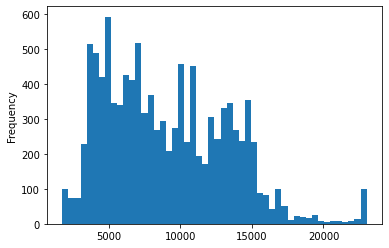

In [ ]:
df_2.loc[df_2['Price']>=23017,'Price']=23017

df_2['Price'].plot(kind='hist',bins=50)

df_2.head()

In [ ]:
x=df_2.drop('Price',axis=1)
y=df_2['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_1=rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print('MAE',mean_absolute_error(y_test,y_pred_1))
print('MSE',mean_squared_error(y_test,y_pred_1))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_1)))

MAE 1682.2434770254254
MSE 6599769.124676865
RMSE 2569.0015812912347


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2_score(y_test,y_pred_1)

0.634167408740318

In [ ]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                  'criterion':["mse", "mae"]}
print(random_grid)

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [ ]:

### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
final_model=rf_randomcv.best_estimator_

In [ ]:
rf_randomcv.best_params_

{'criterion': 'mse',
 'max_depth': 1000,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
y_pred=final_model.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

1669.0174328297978

In [ ]:
mean_squared_error(y_test,y_pred)

6213947.129324089

In [ ]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 1669.0174328297978
MSE 6213947.129324089
RMSE 2492.7789972887867


In [ ]:
r2_score(y_test,y_pred)

0.6555539538843191